In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Cleaning and Processing

In [535]:
data=pd.read_csv('data_drift/Data-Drift.csv')


In [536]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301718 entries, 0 to 301717
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   District Name                301718 non-null  object
 1   Year                         301718 non-null  int64 
 2   Date                         301718 non-null  object
 3   Time of Day                  301718 non-null  object
 4   Number of vehicles involved  301718 non-null  int64 
 5   Number of Casualties         301718 non-null  int64 
 6   Accident_Classification      301718 non-null  object
 7   Accident_Spot                301718 non-null  object
 8   Urban / Rural                301718 non-null  object
 9   Accident Location            301718 non-null  object
 10  Cause                        301718 non-null  object
 11  Accident Severity            301718 non-null  object
 12  Junction Control             301718 non-null  object
 13  Road_Character

In [537]:
#converting to datetime
data['Date']=pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [538]:
#replacing nan in column Lane_Type with Unknown
data.fillna({'Lane_Type':'Unknown'},inplace=True)

In [539]:
data['Month']=data['Date'].dt.month #adding a new column for month
data['Day_of_Week']=data['Date'].dt.day_name() # adding a new column for day
data['Weather Condition']=data['Weather Condition'].str.strip().str.title()#removing spaces from weather conditions string if any

data['Weather Condition']=data['Weather Condition'].replace({
    'Fog Or Mist': 'Fog / Mist',
    'Mist Or Fog': 'Fog / Mist',
    'Clear ': 'Clear',
    'Rainy / Windy':'Rainy'
})

In [540]:
data['Junction Control']=data['Junction Control'].replace({
    'Stop sign': 'Stop Sign',
    'Stop Sign':'Stop Sign',
    'No Signal Lights': 'No Signal',
    'No signal lights': 'No Signal',
    'Signal Lights': 'Signal',
    'Police / Manual': 'Controlled',
    'Uncontrolled': 'Uncontrolled',
    'Not at  Junction': 'Not at Junction',
    'Not Applicable': 'Unknown'
})

In [541]:
data['Accident_Classification']=data['Accident_Classification'].replace({
    'Rail Road Accidents':'Other',
    'Other Railway Accidents':'Other',
    'Not Applicable':'Unkown'
})

In [542]:
data['Accident Location']=data['Accident Location'].replace({
    'Open area': 'Open Area',
    'Residential area': 'Residential Area',
    'Near Bus stop': 'Near Bus Stop'
})

In [543]:
data['Cause']=data['Cause'].replace({
    'Not Applicable':'Unknown'
})

In [544]:
data['Road_Type']=data['Road_Type'].replace({
    'Not Applicable': 'Unknown'
})

In [545]:
data['Surface_Type']=data['Surface_Type'].replace({
    'Not Applicable': 'Unknown'
})

In [546]:
def fill_lane(row):
    if row['Lane_Type'] == 'Unknown':
        if row['Road_Type'] == 'Rural Roads':
            return 'SingleLane'
        elif row['Road_Type'] == 'Urban Roads':
            return 'DualLane'
        elif row['Road_Type'] == 'Highways & Expressways':
            return np.random.choice(['FourLane', 'SixLane'], p=[0.7, 0.3])
    return row['Lane_Type']  

data['Lane_Type'] = data.apply(fill_lane, axis=1)


# Total number of accidents by district
Calculate and visualize the total number of accidents reported in each district. 

In [547]:
accidents_per_district=data['District Name'].value_counts()

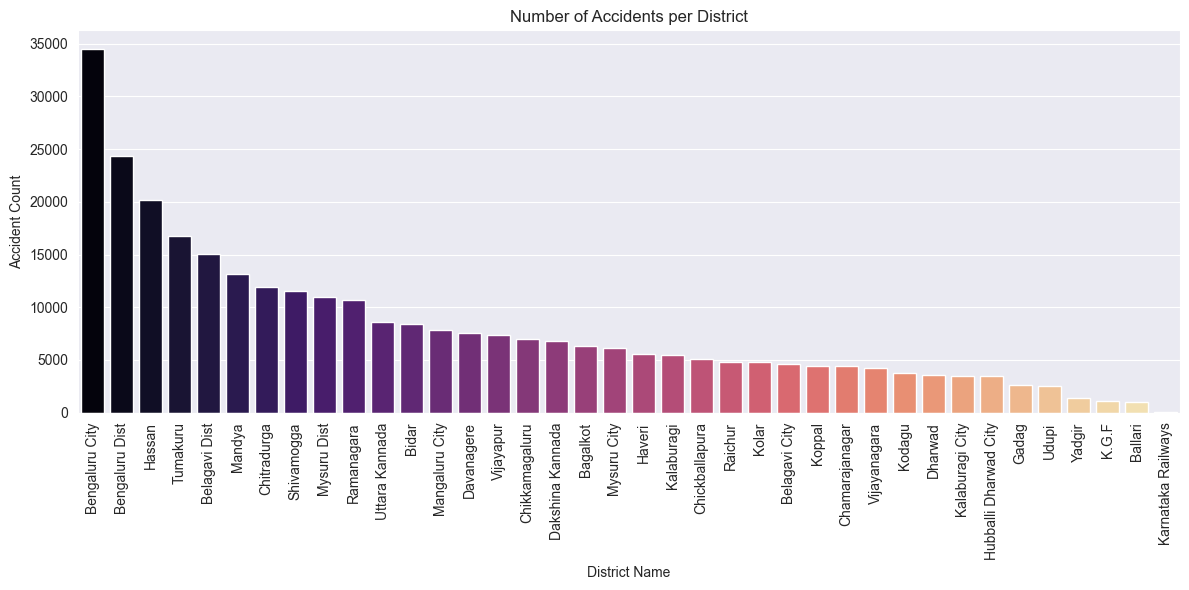

In [577]:
import seaborn as sns

district_data=accidents_per_district.reset_index()
district_data.columns=['District Name','Accident Count']

plt.figure(figsize=(12,6))
sns.barplot(data=district_data,x='District Name',y='Accident Count',hue='District Name',palette='magma',legend=False)
plt.title('Number of Accidents per District')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Accident Severity Distribution
Analyze and present the distribution and percentage share of casualties by severity level (Fatal, Serious, Slight).


In [578]:
severity_casualty=data.groupby('Accident Severity')['Number of Casualties'].sum()

In [579]:
severity_data=severity_casualty.reset_index()
severity_data.columns=['Accident Severity','Number of Casualties']
#severity_data

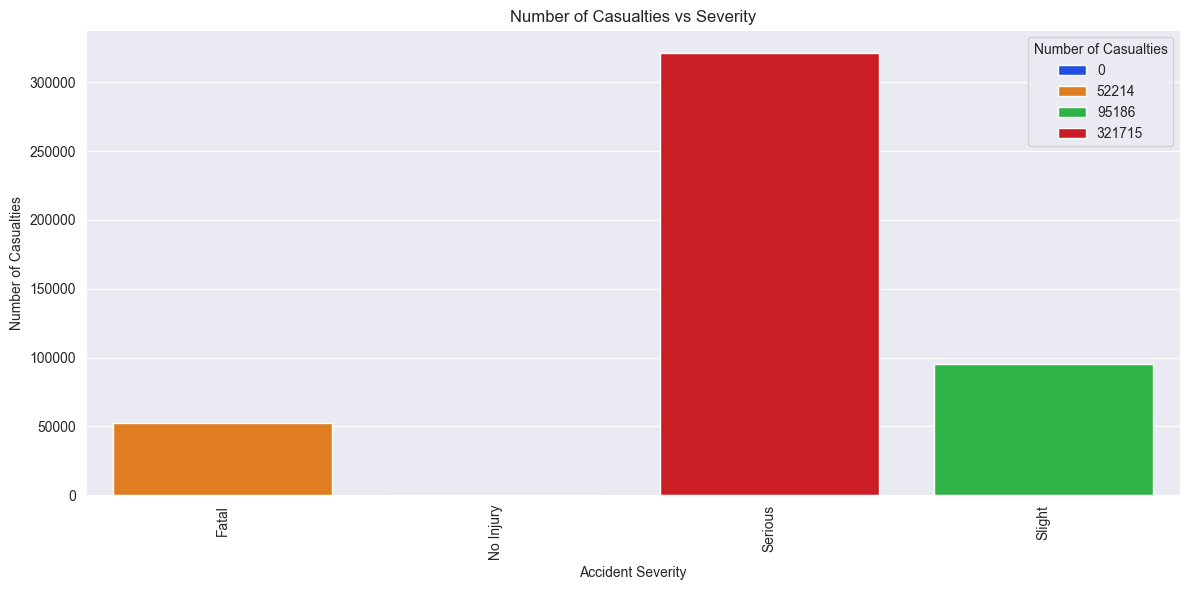

In [580]:
plt.figure(figsize=(12,6))
sns.barplot(data=severity_data,x='Accident Severity',y='Number of Casualties',hue='Number of Casualties',palette='bright')
plt.title('Number of Casualties vs Severity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

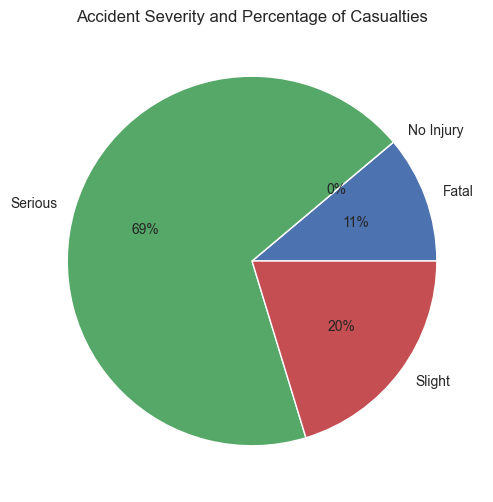

In [581]:
palette_color=sns.color_palette('deep')
plt.figure(figsize=(8,6))
plt.title('Accident Severity and Percentage of Casualties')
plt.pie(severity_data['Number of Casualties'],labels=severity_data['Accident Severity'],colors=palette_color,autopct='%.0f%%')
plt.show()

# Accident Patterns by Time of Day and Day of Week
Identify accident trends across different times of the day and days of the week. Additionally, compare accident frequencies between weekdays and weekends.

In [582]:
accidents_timeofday=data['Time of Day'].value_counts()
timeofday_data=accidents_timeofday.reset_index()
timeofday_data.columns=['Time of Day','Number of Accidents']
timeofday_data

,Time of Day,Number of Accidents
0,Night,114079
1,Evening,87583
2,Morning,57055
3,Afternoon,43001


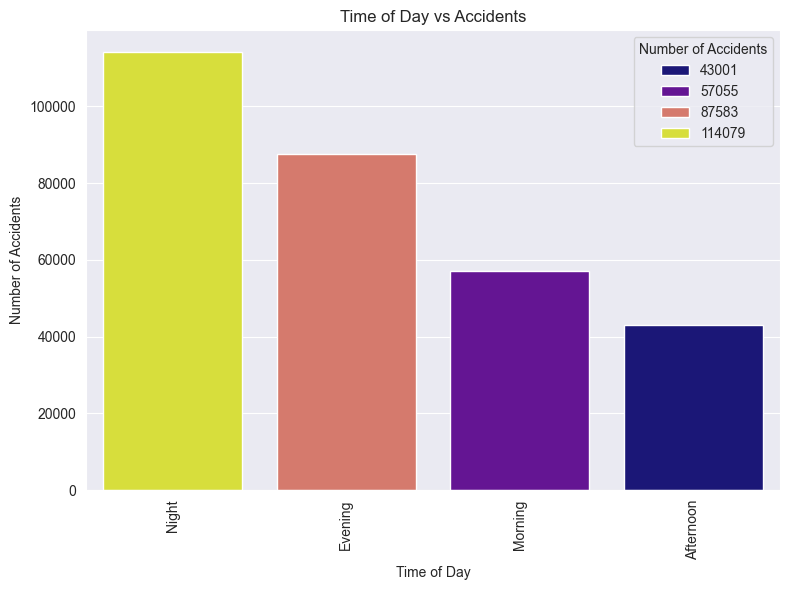

In [583]:
plt.figure(figsize=(8,6))
sns.barplot(timeofday_data,x='Time of Day',y='Number of Accidents',hue='Number of Accidents',palette='plasma')
plt.title('Time of Day vs Accidents')
sns.set_style('dark')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [584]:
accidents_daysofweek=data['Day_of_Week'].value_counts()
daysofweek_data=accidents_daysofweek.reset_index()
daysofweek_data.columns=['Day of Week','Number of Accidents']
daysofweek_data

,Day of Week,Number of Accidents
0,Sunday,43325
1,Tuesday,43313
2,Wednesday,43271
3,Monday,43249
4,Friday,42945
5,Saturday,42852
6,Thursday,42763


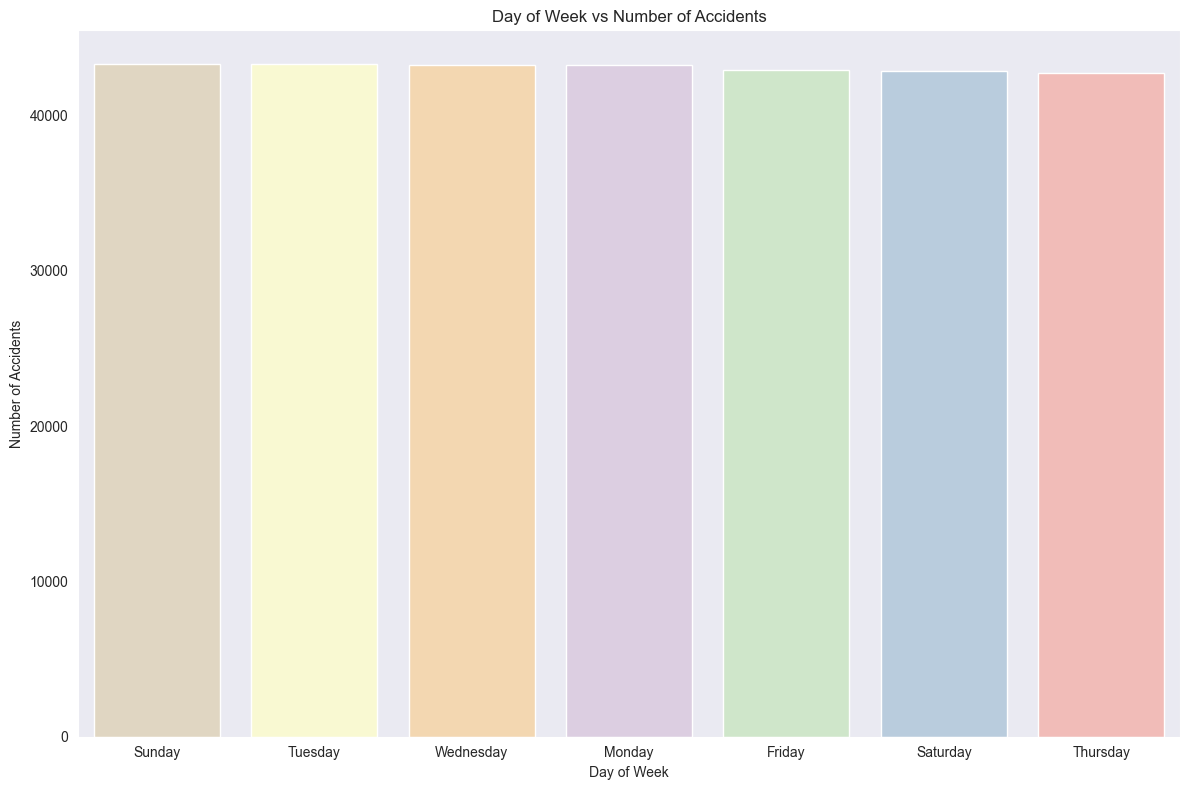

In [585]:
plt.figure(figsize=(12,8))
sns.barplot(daysofweek_data,x='Day of Week',y='Number of Accidents',hue='Number of Accidents',palette='Pastel1',legend=False)
plt.title('Day of Week vs Number of Accidents')
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

In [586]:
weekend=['Saturday','Sunday']
daysofweek_data['Day Type']=daysofweek_data['Day of Week'].apply(lambda x: 'Weekends' if x in weekend else 'Weekdays')
sum=daysofweek_data.groupby('Day Type')['Number of Accidents'].sum().reset_index()

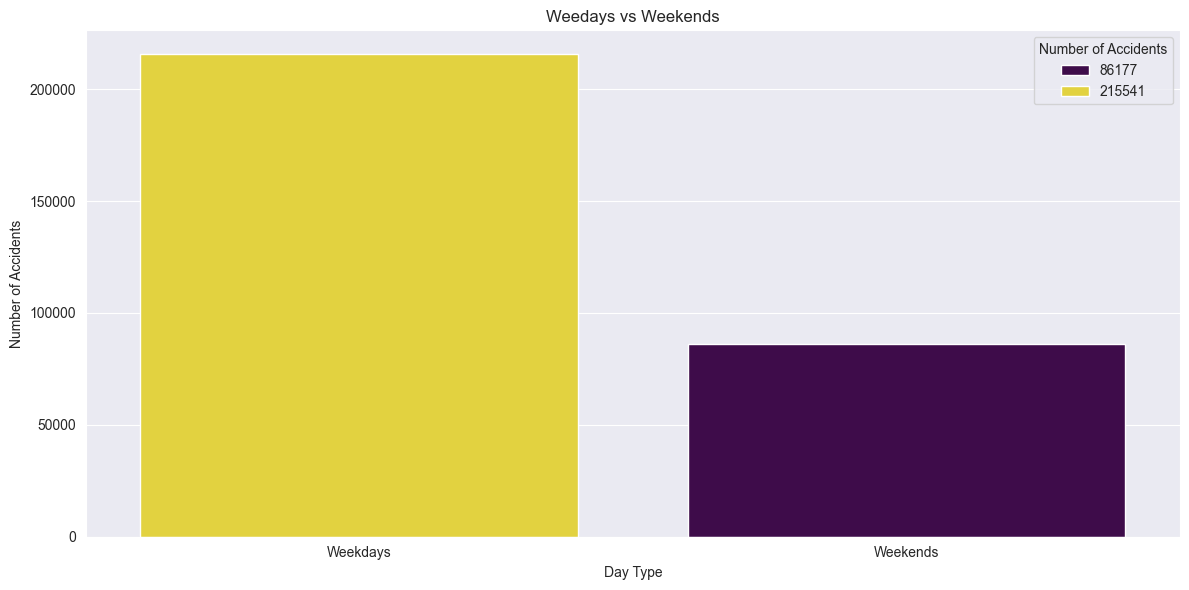

In [587]:
plt.figure(figsize=(12,6))
sns.barplot(sum,x='Day Type',y='Number of Accidents',hue='Number of Accidents',palette='viridis',legend=True)
plt.title('Weedays vs Weekends')
sns.set_style('dark')
plt.tight_layout()
plt.show()


# Road Type contribution to Accidents
Determine which types of roads are associated with the highest number of accidents.

In [588]:
roadtype_accidents=data['Road_Type'].value_counts().reset_index()
roadtype_accidents.columns=['Road Type','Number of Accidents']
roadtype_accidents

,Road Type,Number of Accidents
0,Highways & Expressways,165855
1,Urban Roads,85486
2,Rural Roads,43369
3,Unknown,7008


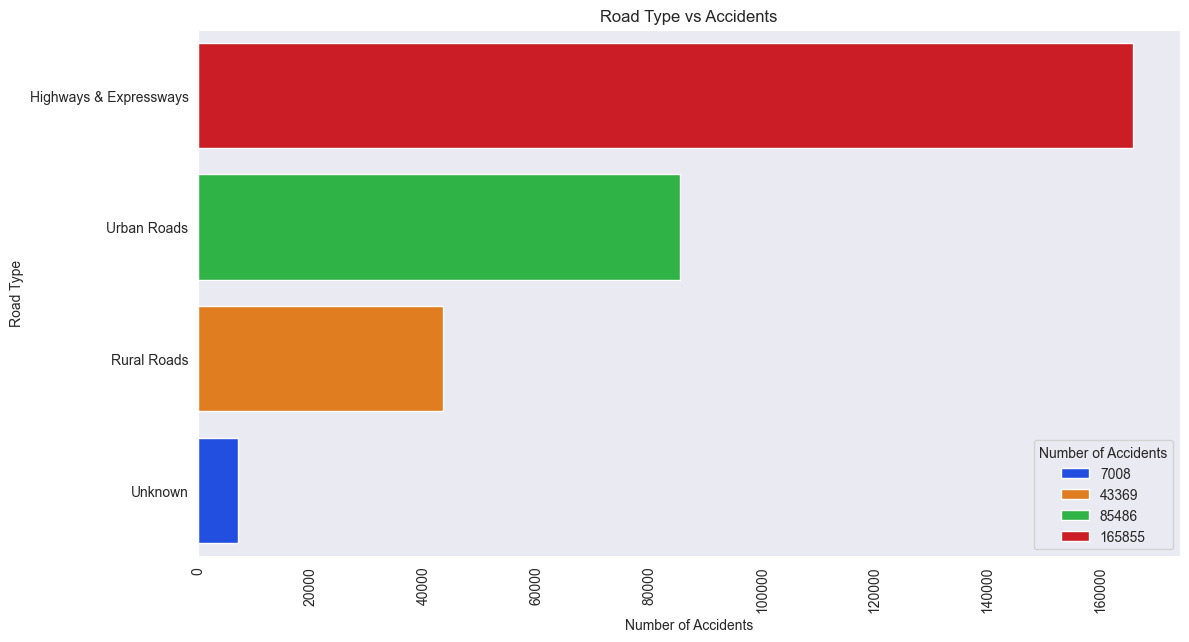

In [589]:
plt.figure(figsize=(12,6))
sns.barplot(roadtype_accidents,x='Number of Accidents',y='Road Type',hue='Number of Accidents',palette='bright',legend=True)
sns.set_style('darkgrid')
plt.tight_layout()
plt.title("Road Type vs Accidents")
plt.xticks(rotation=90)
plt.show()

# Casualty Distribution by Weather Condition
Analyze the breakdown of total _Casualties_ under different *_Weather Conditions_*.

In [590]:
weather_casualties=data.groupby('Weather Condition')['Number of Casualties'].sum().reset_index()
print(weather_casualties)

  Weather Condition  Number of Casualties
0             Clear                356052
1            Cloudy                 11338
2        Fog / Mist                  2687
3      Rain / Windy                 99038


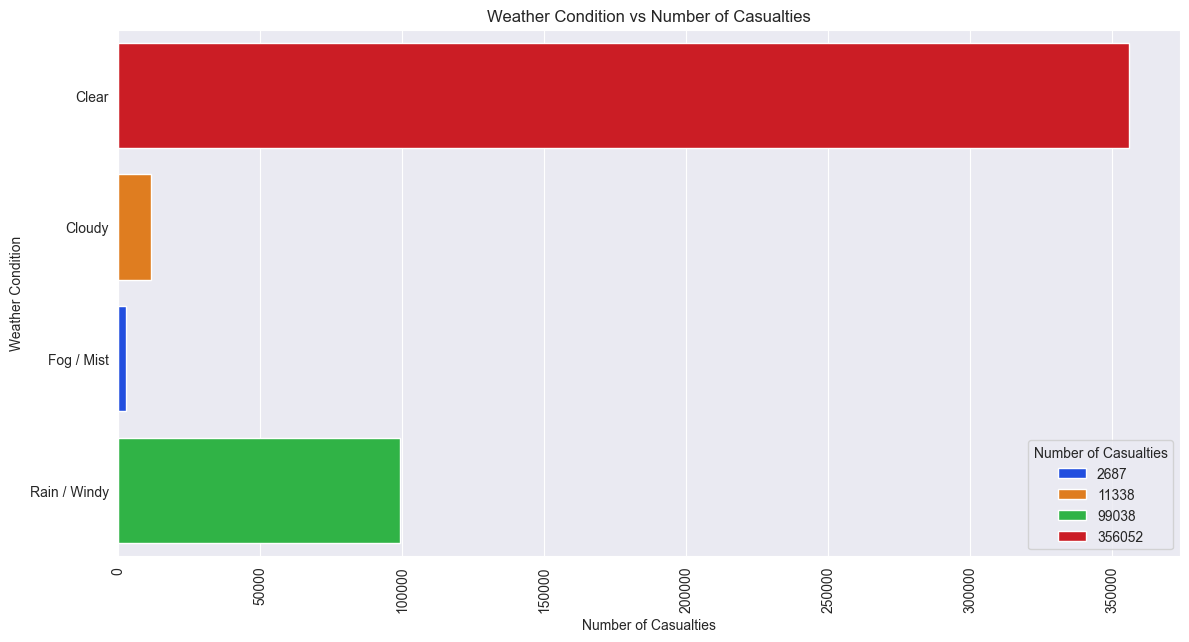

In [591]:
plt.figure(figsize=(12,6))
sns.barplot(weather_casualties,x='Number of Casualties',y='Weather Condition',hue='Number of Casualties',palette='bright',legend=True)
sns.set_style('darkgrid')
plt.tight_layout()
plt.title("Weather Condition vs Number of Casualties")
plt.xticks(rotation=90)
plt.show()

# Accidents by Lane Type
Assess the number of accidents by _Lane Type_

In [592]:
lanetype_accidents=data['Lane_Type'].value_counts().reset_index()
lanetype_accidents.columns=['Lane Type','Accidents']

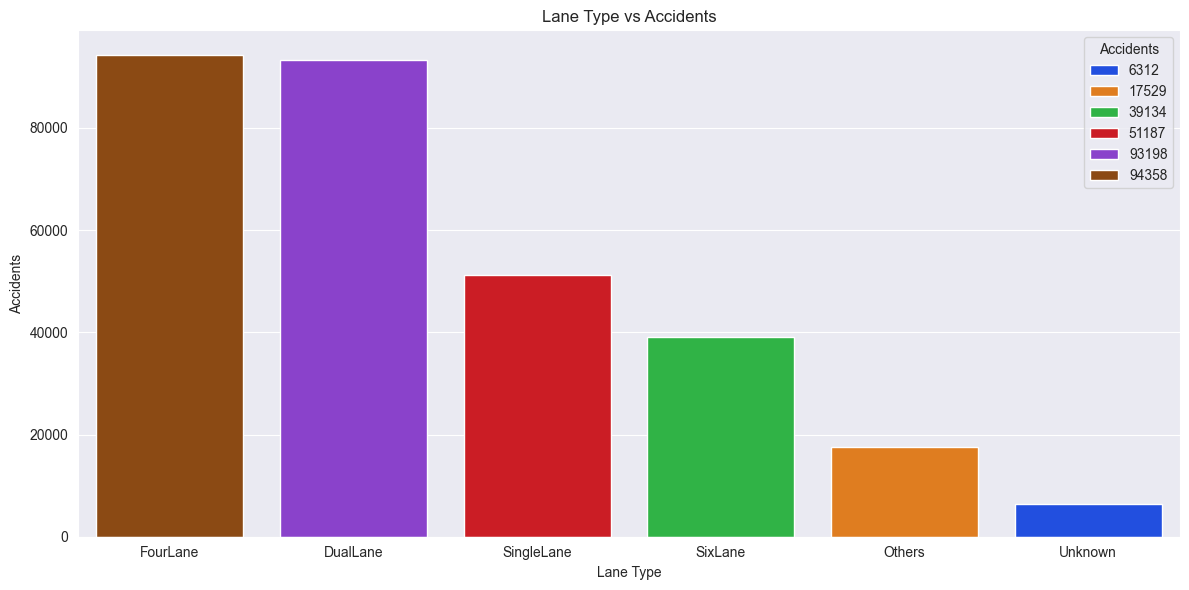

In [593]:
plt.figure(figsize=(12,6))
sns.barplot(lanetype_accidents,x='Lane Type',y='Accidents',hue='Accidents',palette='bright',legend=True)
plt.title('Lane Type vs Accidents')
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

# Accidents by Road Character and Severity
Visualize how different road geometries impact accident severity levels

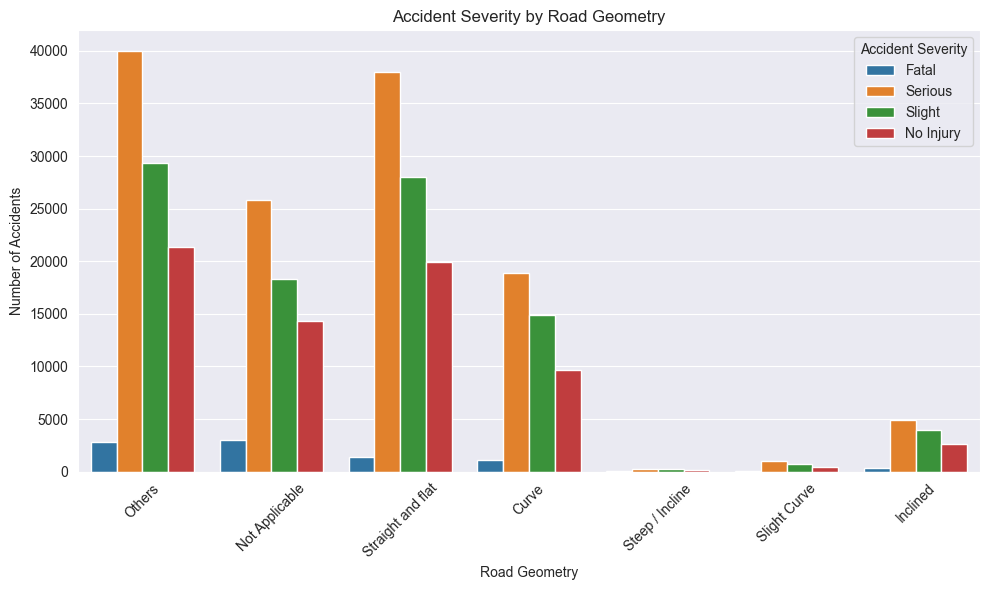

In [594]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Character', hue='Accident Severity')
plt.xticks(rotation=45)
plt.title('Accident Severity by Road Geometry')
plt.xlabel('Road Geometry')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


# Accidents by Surface Type
Analyze which types of road surfaces are more prone to accident.

In [595]:
accidents_surfacetype=data['Surface_Type'].value_counts().reset_index()
accidents_surfacetype.columns=['Surface Type','Accidents']
accidents_surfacetype

,Surface Type,Accidents
0,Bitumen(Tar),245711
1,Unknown,24738
2,Concrete,14966
3,Kutcha,6171
4,Surfaced,4812
5,Gravel,3043
6,Metalled,2277


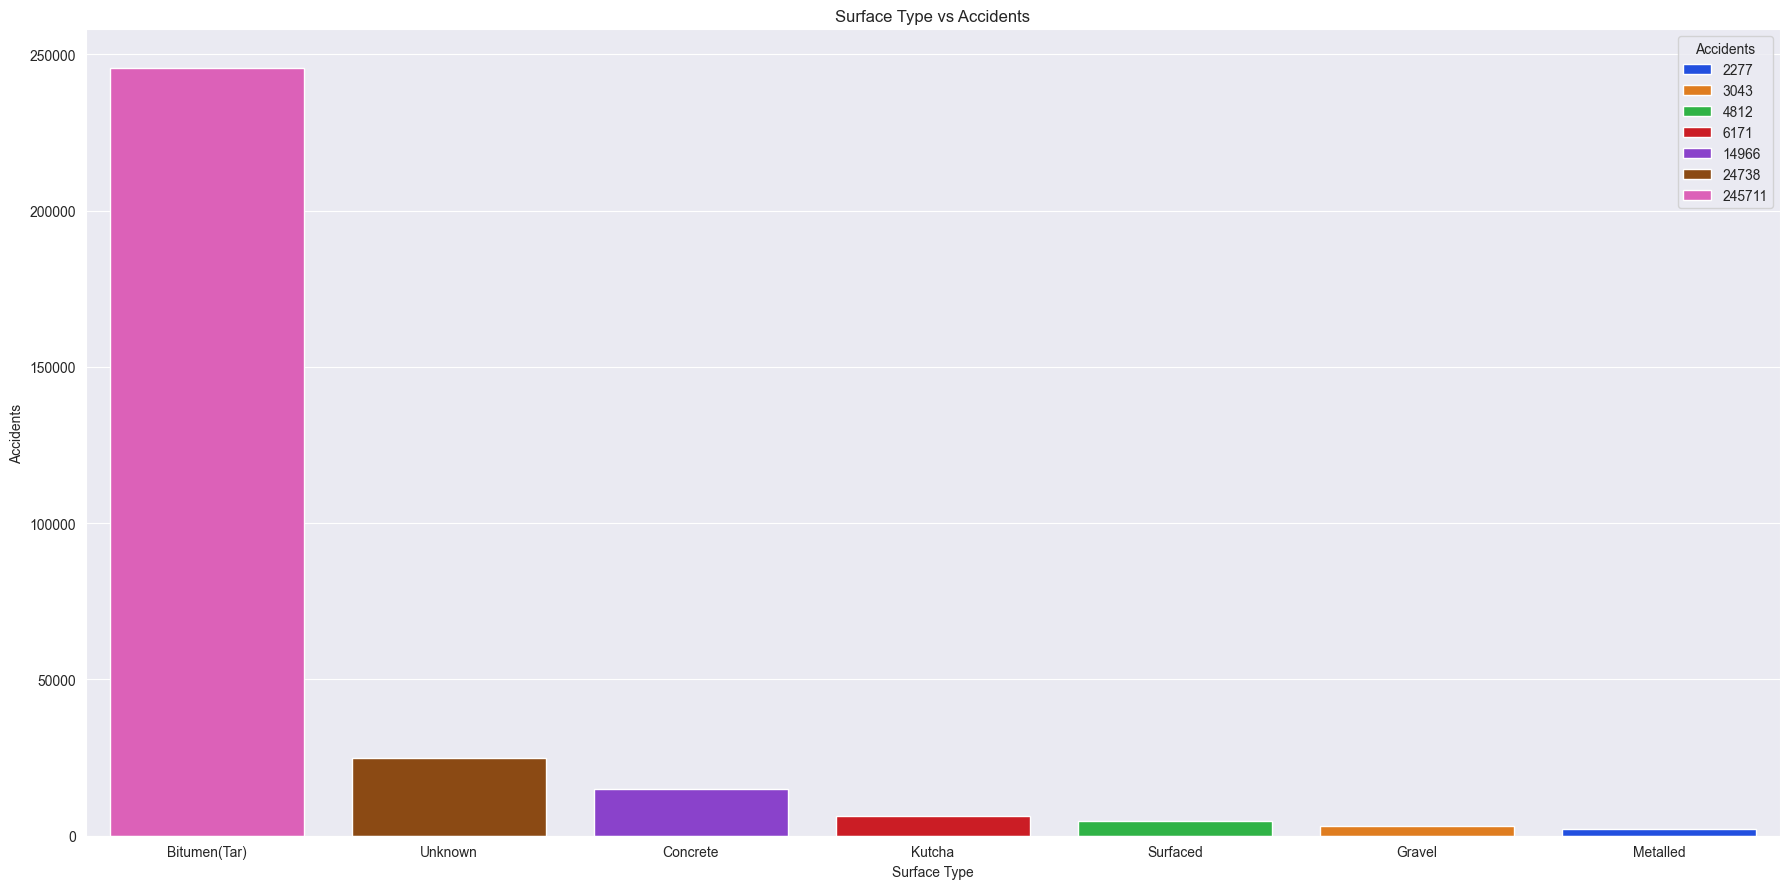

In [596]:
plt.figure(figsize=(18,9))
sns.barplot(accidents_surfacetype,x='Surface Type',y='Accidents',hue='Accidents',palette='bright')
plt.title('Surface Type vs Accidents')
plt.tight_layout()
plt.show()

# Top Causes of Accident
Identify the most common causes of accident and evaluate their impact on overall accident count and severity

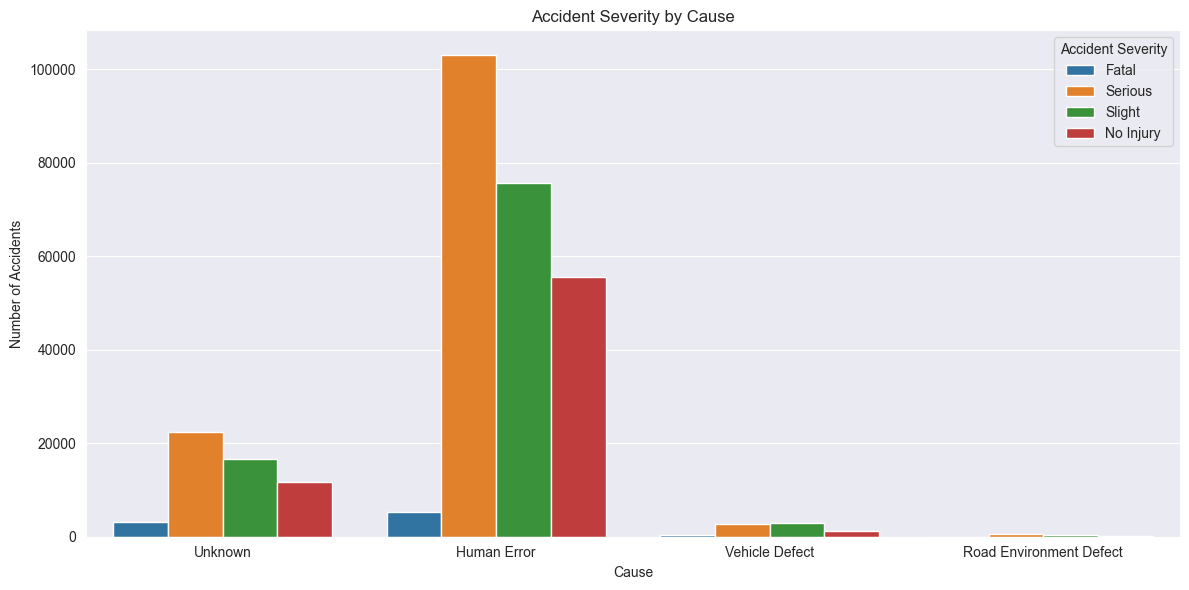

In [597]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Cause', hue='Accident Severity')
plt.title('Accident Severity by Cause')
plt.xlabel('Cause')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


# Monthly Casualty Trend Analysis
Analyze trends in total casualties across months from 2021 to 2023 to uncover seasonal patterns and consistently high-risk periods.


In [ ]:
data['Month'] = data['Date'].dt.to_period('M').dt.to_timestamp() 
monthly_casualties = data.groupby('Month')['Number of Casualties'].sum().reset_index()

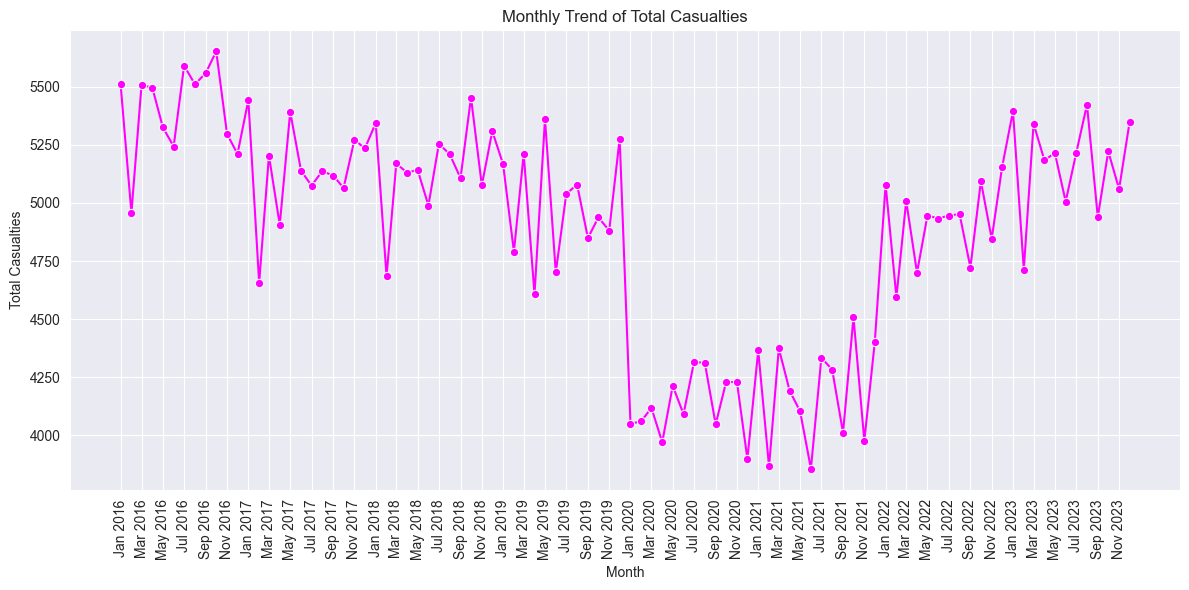

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_casualties, x='Month', y='Number of Casualties', marker='o', color='magenta')
xticks = monthly_casualties['Month'][::2]
xlabels = xticks.dt.strftime('%b %Y')
plt.xticks(ticks=xticks, labels=xlabels, rotation=90)
plt.title('Monthly Trend of Total Casualties')
plt.xlabel('Month')
plt.ylabel('Total Casualties')
plt.tight_layout()
plt.show()


# Casualty Analysis across Surface Condition by Surface Type and Weather Condition
Analyze the impact of surface conditions on casualties by combining surface type and weather condition.

In [600]:
data['Surface_Weather'] = data['Surface_Type'] + ' / ' + data['Weather Condition']
combined_impact = data.groupby('Surface_Weather')['Number of Casualties'].sum().reset_index()
combined_impact = combined_impact.sort_values(by='Number of Casualties', ascending=False)


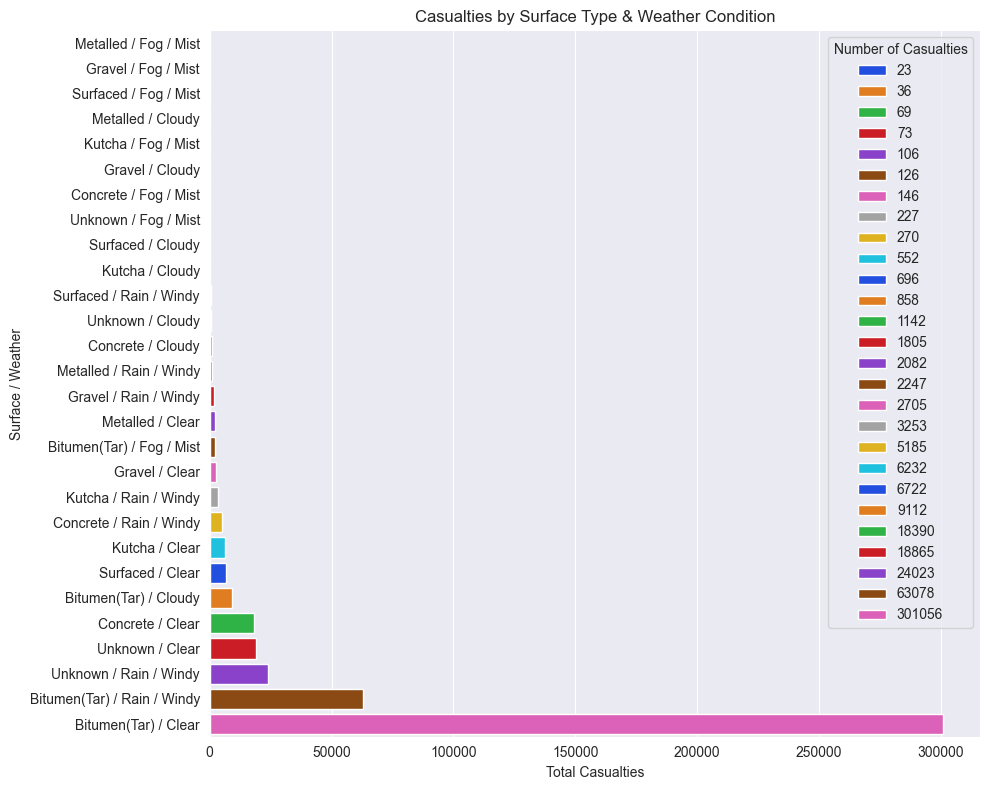

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(data=combined_impact.sort_values(by='Number of Casualties', ascending=True),x='Number of Casualties', y='Surface_Weather',hue='Number of Casualties',palette='bright')
plt.title('Casualties by Surface Type & Weather Condition')
plt.xlabel('Total Casualties')
plt.ylabel('Surface / Weather')
plt.tight_layout()
plt.show()

# Vehicle Involvement by Time of Day and Road Type
Show how the number of vehicles involved in accidents varies across different times of the day and types of roads.

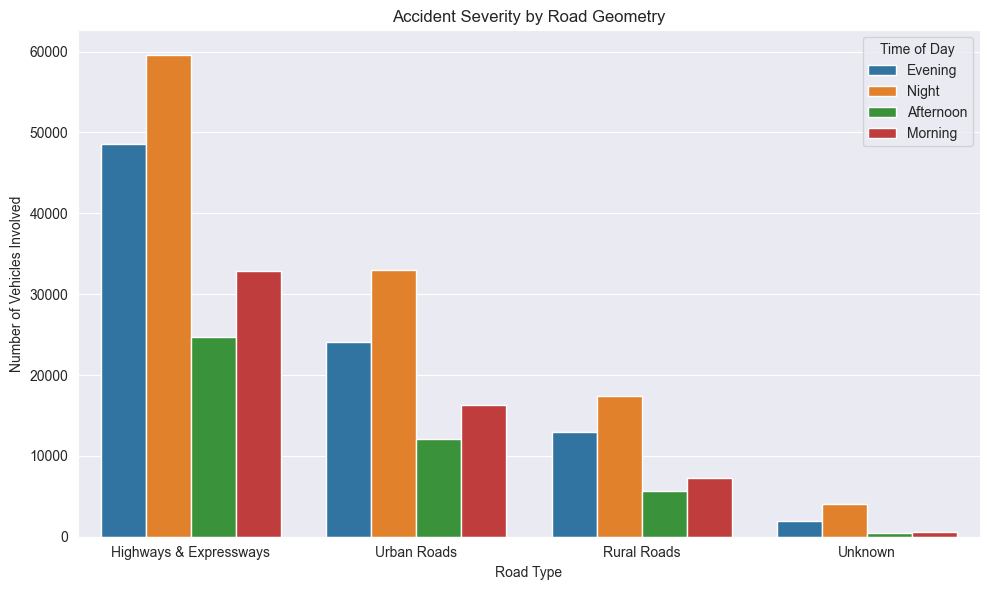

In [602]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Road_Type', hue='Time of Day')
plt.title('Accident Severity by Road Geometry')
plt.xlabel('Road Type')
plt.ylabel('Number of Vehicles Involved')
plt.tight_layout()
plt.show()

# Casualty Analysis at Junction Controls by Accident severity
Analyze how different types of junction controls (e.g., controlled, uncontrolled) correlate with accident severity outcomes.

In [ ]:
pivot=pd.crosstab(data['Junction Control'], data['Accident Severity'])
pivot_norm=pd.crosstab(data['Junction Control'], data['Accident Severity'], normalize='index')


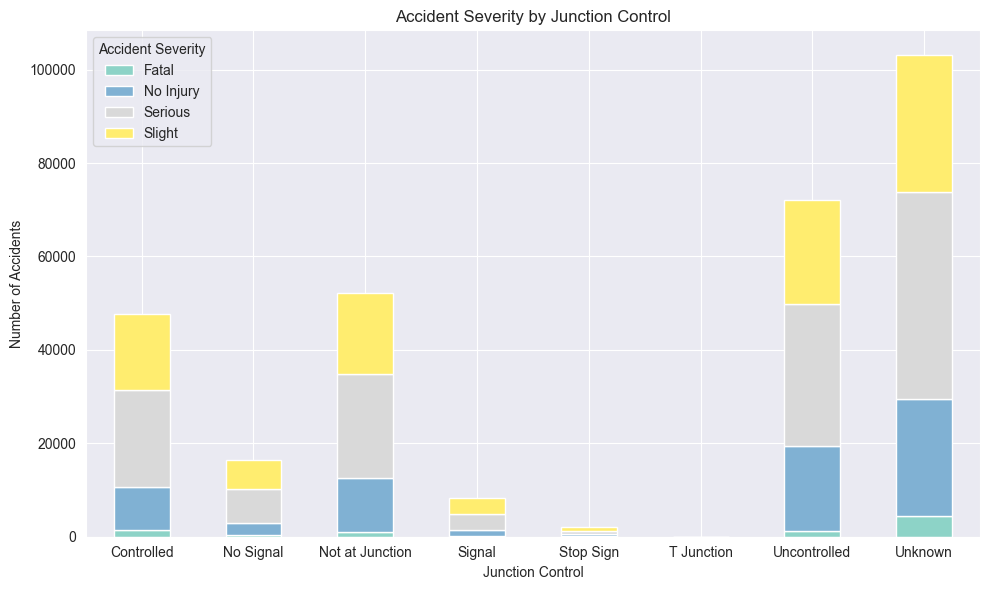

In [604]:
pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set3')
plt.title('Accident Severity by Junction Control')
plt.xlabel('Junction Control')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
